## Imports

In [55]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
import seaborn as sb

## Load and prepare Data

In [2]:
# from https://crcns.org/data-sets/hc/hc-30/about-hc-30
mat_file_path = 'calcium_data/event_traces_Ca2_HPC.mat'

mat_data = scipy.io.loadmat(mat_file_path)['event_traces']

In [4]:
data = {}

for record in mat_data[0]:
    mouse_name = record['mouse_name'][0]
    session_id = record['session_ID'][0]
    trace_matrix = record['traces'].toarray()
    
    max_values = np.max(trace_matrix, axis=0)
    max_values[max_values == 0] = 1
    normalized_trace_matrix = trace_matrix / max_values

    if mouse_name not in data:
        data[mouse_name] = {}

    data[mouse_name][session_id] = normalized_trace_matrix

## Neural Eigenspectrum

In [21]:
fit_slopes = []
for mouse_name, sessions in data.items():
    fit_slopes_mouse = []
    for session_id, trace_matrix in sessions.items():
        trace_matrix_reduced = PCA().fit(trace_matrix)
        variances = trace_matrix_reduced.explained_variance_ratio_
        
        cutoff_fit = 80
        x = np.arange(1, len(variances)+1)
        y = variances
        m, b = np.polyfit(np.log(x[:cutoff_fit]), np.log(y[:cutoff_fit]), 1)
        
        fit_slopes_mouse.append(m)
    fit_slopes.append(fit_slopes_mouse)

C:\Users\Afernandez\AppData\Local\Temp\ipykernel_31680\4182822695.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', len(fit_slopes))


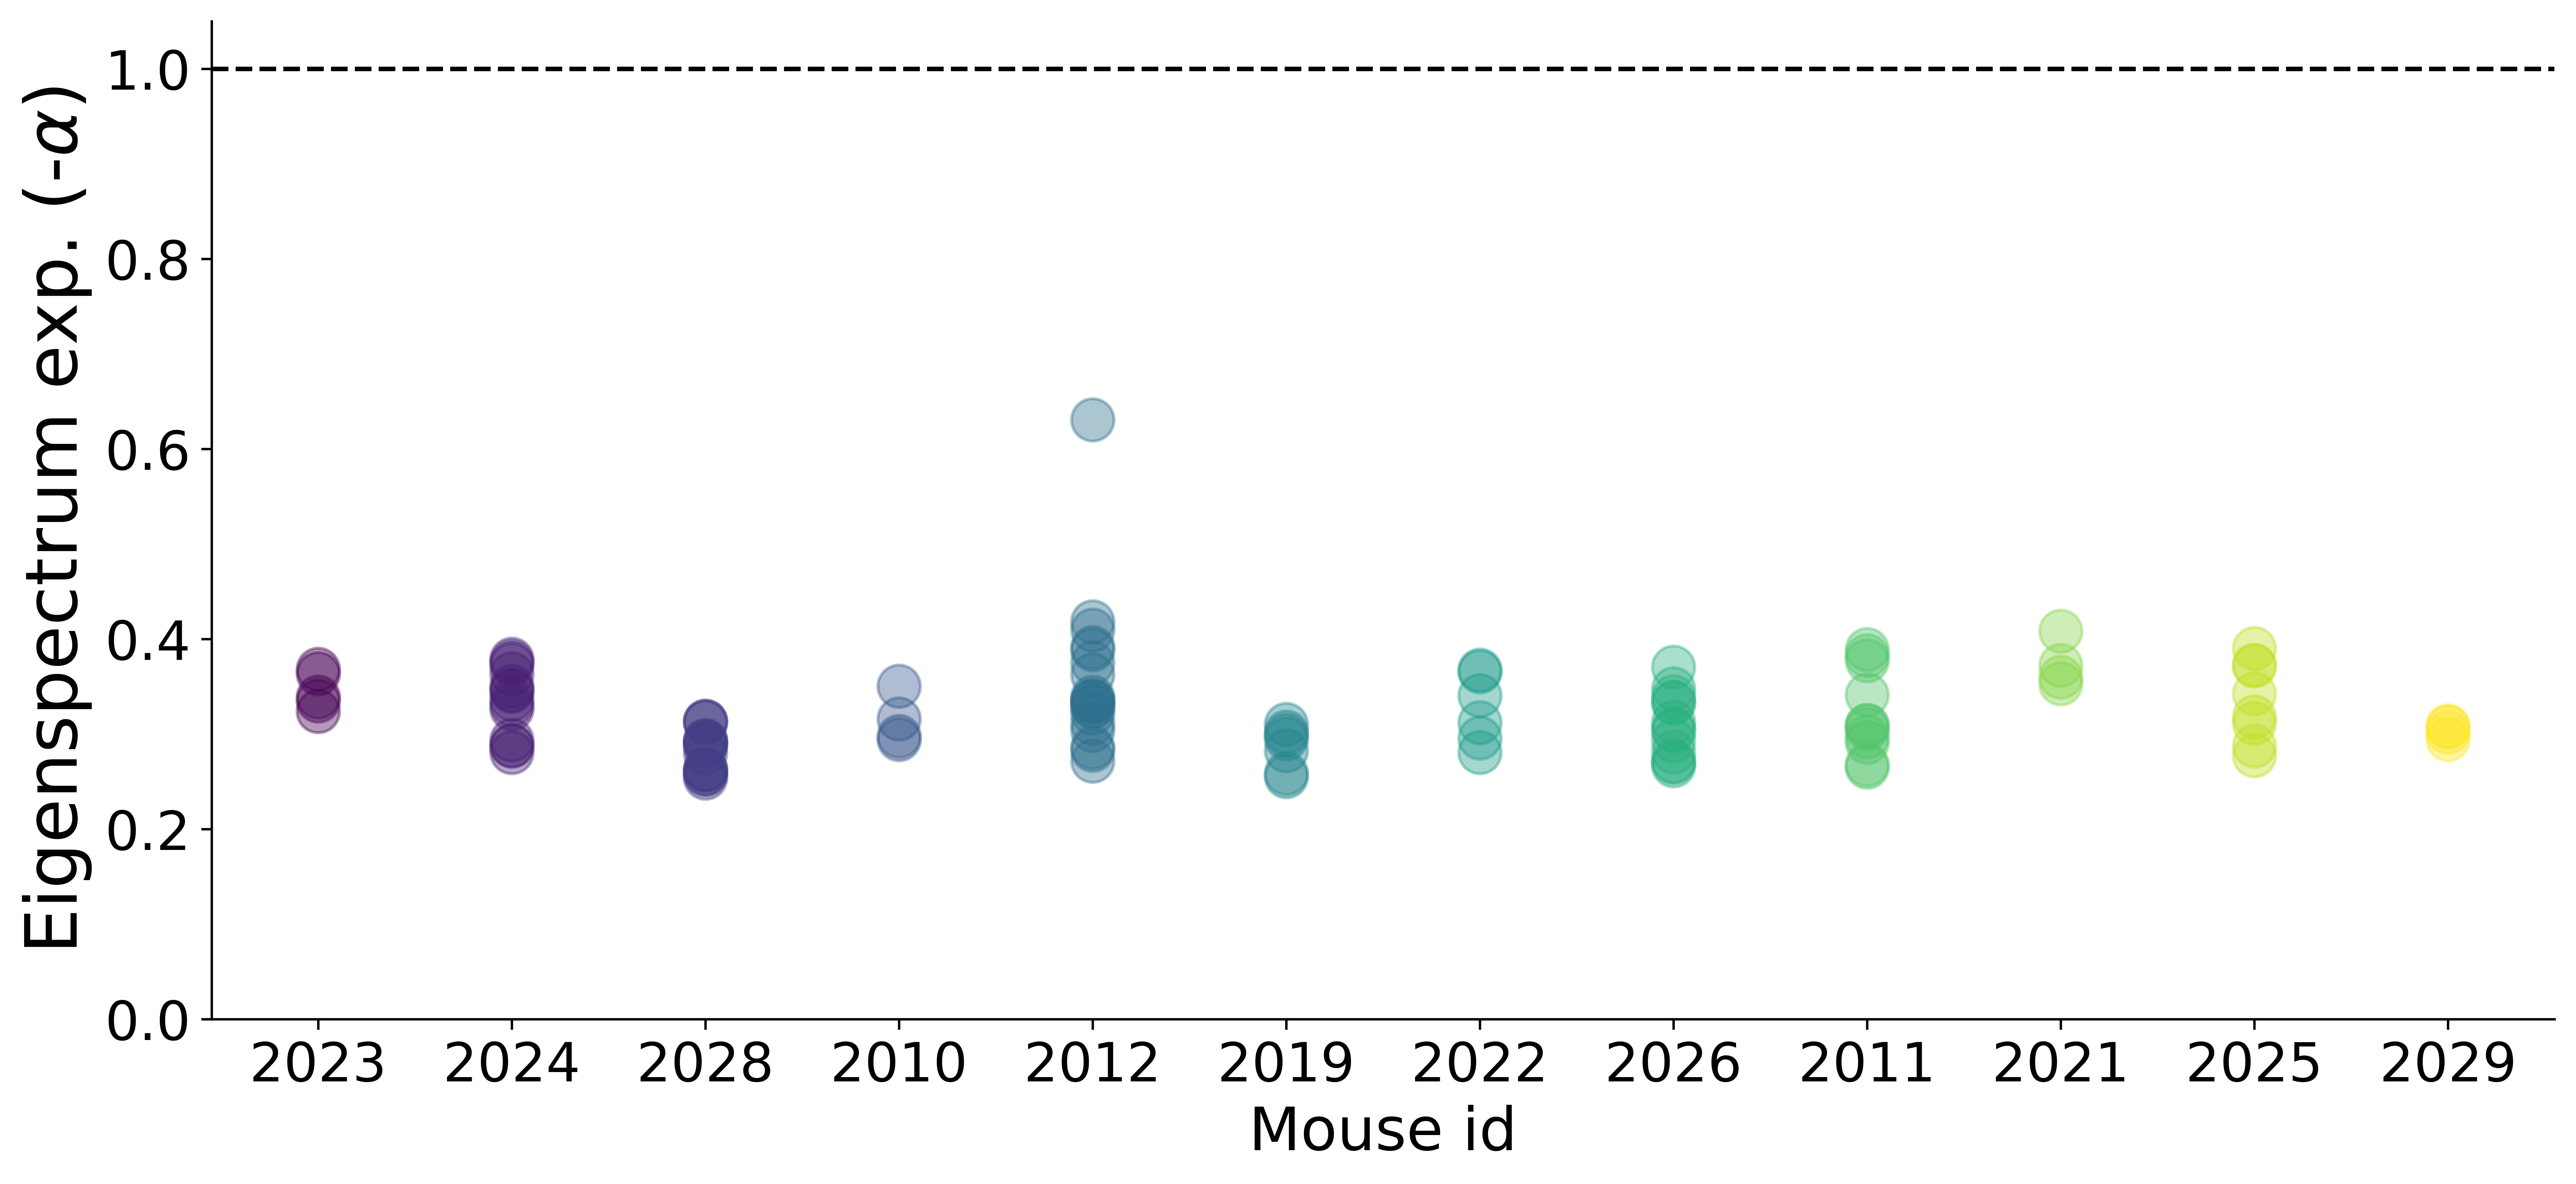

In [80]:
cmap = cm.get_cmap('viridis', len(fit_slopes))

plt.figure(figsize=(14, 6), dpi=600)

# Plot each mouse's data with a different color
for i, mouse_name in enumerate(data.keys()):
    plt.scatter([i] * len(fit_slopes[i]), -np.array(fit_slopes[i]), marker='o', s=200, color=cmap(i), alpha=0.4, label=mouse_name)

plt.ylabel('Eigenspectrum exp. (-$\u03B1$)', fontsize=24)
plt.yticks(fontsize=18)
plt.xticks(ticks=np.arange(len(data)), labels=[mouse_name[5:] for mouse_name in data.keys()], fontsize=18)
plt.xlabel('Mouse id', fontsize=20)

plt.axhline(y=1, color='k', linestyle='--')

plt.ylim(0,1.05)

sb.despine()
plt.show()

### Eigenspectrum plots

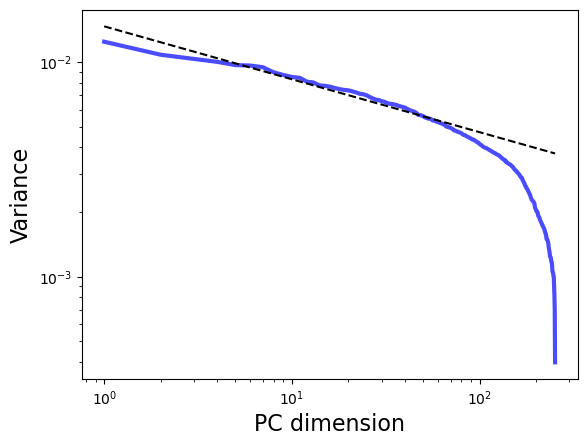

In [57]:
trace_matrix_reduced = PCA().fit(data['Mouse2026']['103302'])
variances = trace_matrix_reduced.explained_variance_ratio_

cutoff_fit = 80
x = np.arange(1, len(variances)+1)
y = variances
m, b = np.polyfit(np.log(x[:cutoff_fit]), np.log(y[:cutoff_fit]), 1)

x = np.arange(1, len(variances)+1)
y = variances

plt.plot(x, y, color='blue', linewidth=3, alpha=0.7)

#plt.vlines(x=1e3, ymin=1e-3, ymax=6e-3, color='black', linewidth=3, linestyle='--')

m, b = np.polyfit(np.log(x[:cutoff_fit]), np.log(y[:cutoff_fit]), 1)
#plt.plot(np.exp(x), np.exp(m*x+b), linestyle='--', color='black', linewidth=1.5)

x_fit = x
y_fit = np.exp(b) * x_fit**m
plt.plot(x_fit, y_fit, linestyle='--', color='black', linewidth=1.5)

plt.xlabel('PC dimension', fontsize=16)
plt.ylabel('Variance', fontsize=16)
plt.xscale('log')
plt.yscale('log')

plt.show()